<a href="https://colab.research.google.com/github/88kHw88/BTC-project/blob/main/BTC_MAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#Project to calculate 200 day moving average (200EMA)  moving average and 50 day moving average (50EMA)

In [20]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/88kHw88/BTC-project/main/data/BTC-USD%20(4).csv', parse_dates=['Date'])
#show df.head and df.tail
df.head().append(df.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
2606,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,3.060510e+10
2607,2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,2.909493e+10
2608,2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,2.472675e+10
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,4.112561e+10
2610,2021-11-09,67380.914063,68530.335938,66385.218750,67413.859375,67413.859375,4.358587e+10


In [21]:
#set_index on 'Date'
#df = df.set_index('Date')
#df.head()

In [22]:
#remove irrelevant columns
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [23]:
#rename columns
df = df.rename(columns={'Close':'Price'})
df.head()

,Date,Price
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [24]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2611 non-null   datetime64[ns]
 1   Price   2607 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


In [25]:
#add future dates
#We want to extrapolate the 50 day MA and 200 day MA to predict the golden cross/death cross (by estimate)

#https://stackoverflow.com/questions/59864088/create-future-dataframe-date-column-pandas-python
#https://stackoverflow.com/questions/51487017/pandas-rolling-window-mean-in-the-future
#apply pd.date_range(.....)
#.shift() to realign dates
#append df and future date


#create new DataFrame to extend the current df dates
#apply pd.date_range and extrapolate with 50 days
future_dates = pd.DataFrame(pd.date_range(df['Date'].max(), periods=50).shift())
future_dates = future_dates.rename(columns={0:'Date'})
#append df with new DataFrame
df_pred = df.append(future_dates)
df_pred2 = df_pred.set_index('Date')
df_pred2.tail(15)



#https://stackoverflow.com/questions/59844745/adding-future-dates-to-dataframe
#future_dates = (df['Date'] + pd.Timedelta(6, unit='days')).to_frame()

,Price
Date,
2021-12-15,NaN
2021-12-16,NaN
2021-12-17,NaN
2021-12-18,NaN
2021-12-19,NaN
2021-12-20,NaN
2021-12-21,NaN
2021-12-22,NaN
2021-12-23,NaN


In [26]:
#Function to calculate Moving Average
def calc_moving_average(df, column_name, days):
  df[column_name] = df.rolling(window=days).mean()


#Function to make a multiline graph
##https://www.python-graph-gallery.com/122-multiple-lines-chart
def make_graph(df):
  fig = plt.figure()
  fig, ax = plt.subplots()

  x = df.index
  y1 = df['Price']
  y2 = df['50MA']
  y3 = df['200MA']

  #linechart 1: price
  plt.plot(x,y1)
  plt.plot(x,y2, color='red')
  plt.plot(x,y3, color='green')
  fig.set_size_inches(50,20)
  plt.legend
  plt.grid(axis='both')
  plt.show()

In [27]:
df2 = df_pred2.copy()
#calculate rolling 50MA
#'50D' is used because we want to count the DateTime. We don't use the (int) 50 because it counts the index
#https://stackoverflow.com/questions/48855400/pandas-rolling-window-datetime-indexes-what-does-offset-mean
calc_moving_average(df2, '50MA', 50)
df2

,Price,50MA
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2021-12-25,NaN,NaN
2021-12-26,NaN,NaN
2021-12-27,NaN,NaN


In [28]:
df3 = df_pred2.copy()
#calculate rolling 200MA
calc_moving_average(df3, '200MA', 200)
df3

,Price,200MA
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2021-12-25,NaN,NaN
2021-12-26,NaN,NaN
2021-12-27,NaN,NaN


In [29]:
#merge df2(50MA) and df3(200MA)
#BTC price from 2014 until present day
BTC_MA = pd.merge(df3, df2, left_index=True, right_index=True)
BTC_MA = BTC_MA.drop(columns={'Price_y'})
BTC_MA = BTC_MA.rename(columns={'Price_x':'Price'})
BTC_MA.head(200)

#we have 4 missing values in column Price.
#the rest(50) is missing because we extended our dates
BTC_MA.isnull().sum()

Price     54
200MA    628
50MA     203
dtype: int64

In [30]:
#Copy our BTC_MA
BTC_MA2 = BTC_MA.copy()
#Filling missing values of column 'Price'. The line graph shows some missing periods
BTC_MA2['Price'] = BTC_MA2['Price'].interpolate(method='polynomial', order=1)
#found the missing value in this .iloc:
BTC_MA2.iloc[2035:2060,]

#apply function 'calc_moving_average' to calculate the 200MA and 50MA again due
#to interpolation of the 'Price' column:
calc_moving_average(BTC_MA2, '200MA', 200)
calc_moving_average(BTC_MA2, '50MA', 50)

#showing the missing value is filled:
BTC_MA2.iloc[2035:2060,].head()

,Price,200MA,50MA
Date,,,
2020-04-13,6845.037598,8067.272786,7145.757881
2020-04-14,6842.427734,8060.225696,7089.602939
2020-04-15,6642.109863,8052.206670,7035.611035
2020-04-16,7116.804199,8047.269763,7001.536670
2020-04-17,7187.234619,8041.736595,6969.591479


In [31]:
#data from 2021 onwards
#.iloc 2634 = 2021
BTC_2021 = BTC_MA2.iloc[2550:, ]    
BTC_2021.head()

,Price,200MA,50MA
Date,,,
2021-09-10,44883.910156,45955.047149,44950.479609
2021-09-11,45201.457031,45936.932305,45182.877734
2021-09-12,46063.269531,45918.721992,45418.294219
2021-09-13,44963.074219,45908.068106,45610.551953
2021-09-14,47092.492188,45911.831758,45805.651094


### **VISUALIZATION OF THE DATASET**

GOLDEN CROSS = When 50MA is above 200MA

DEATH CROSS = When 50MA is under 200MA

<Figure size 432x288 with 0 Axes>

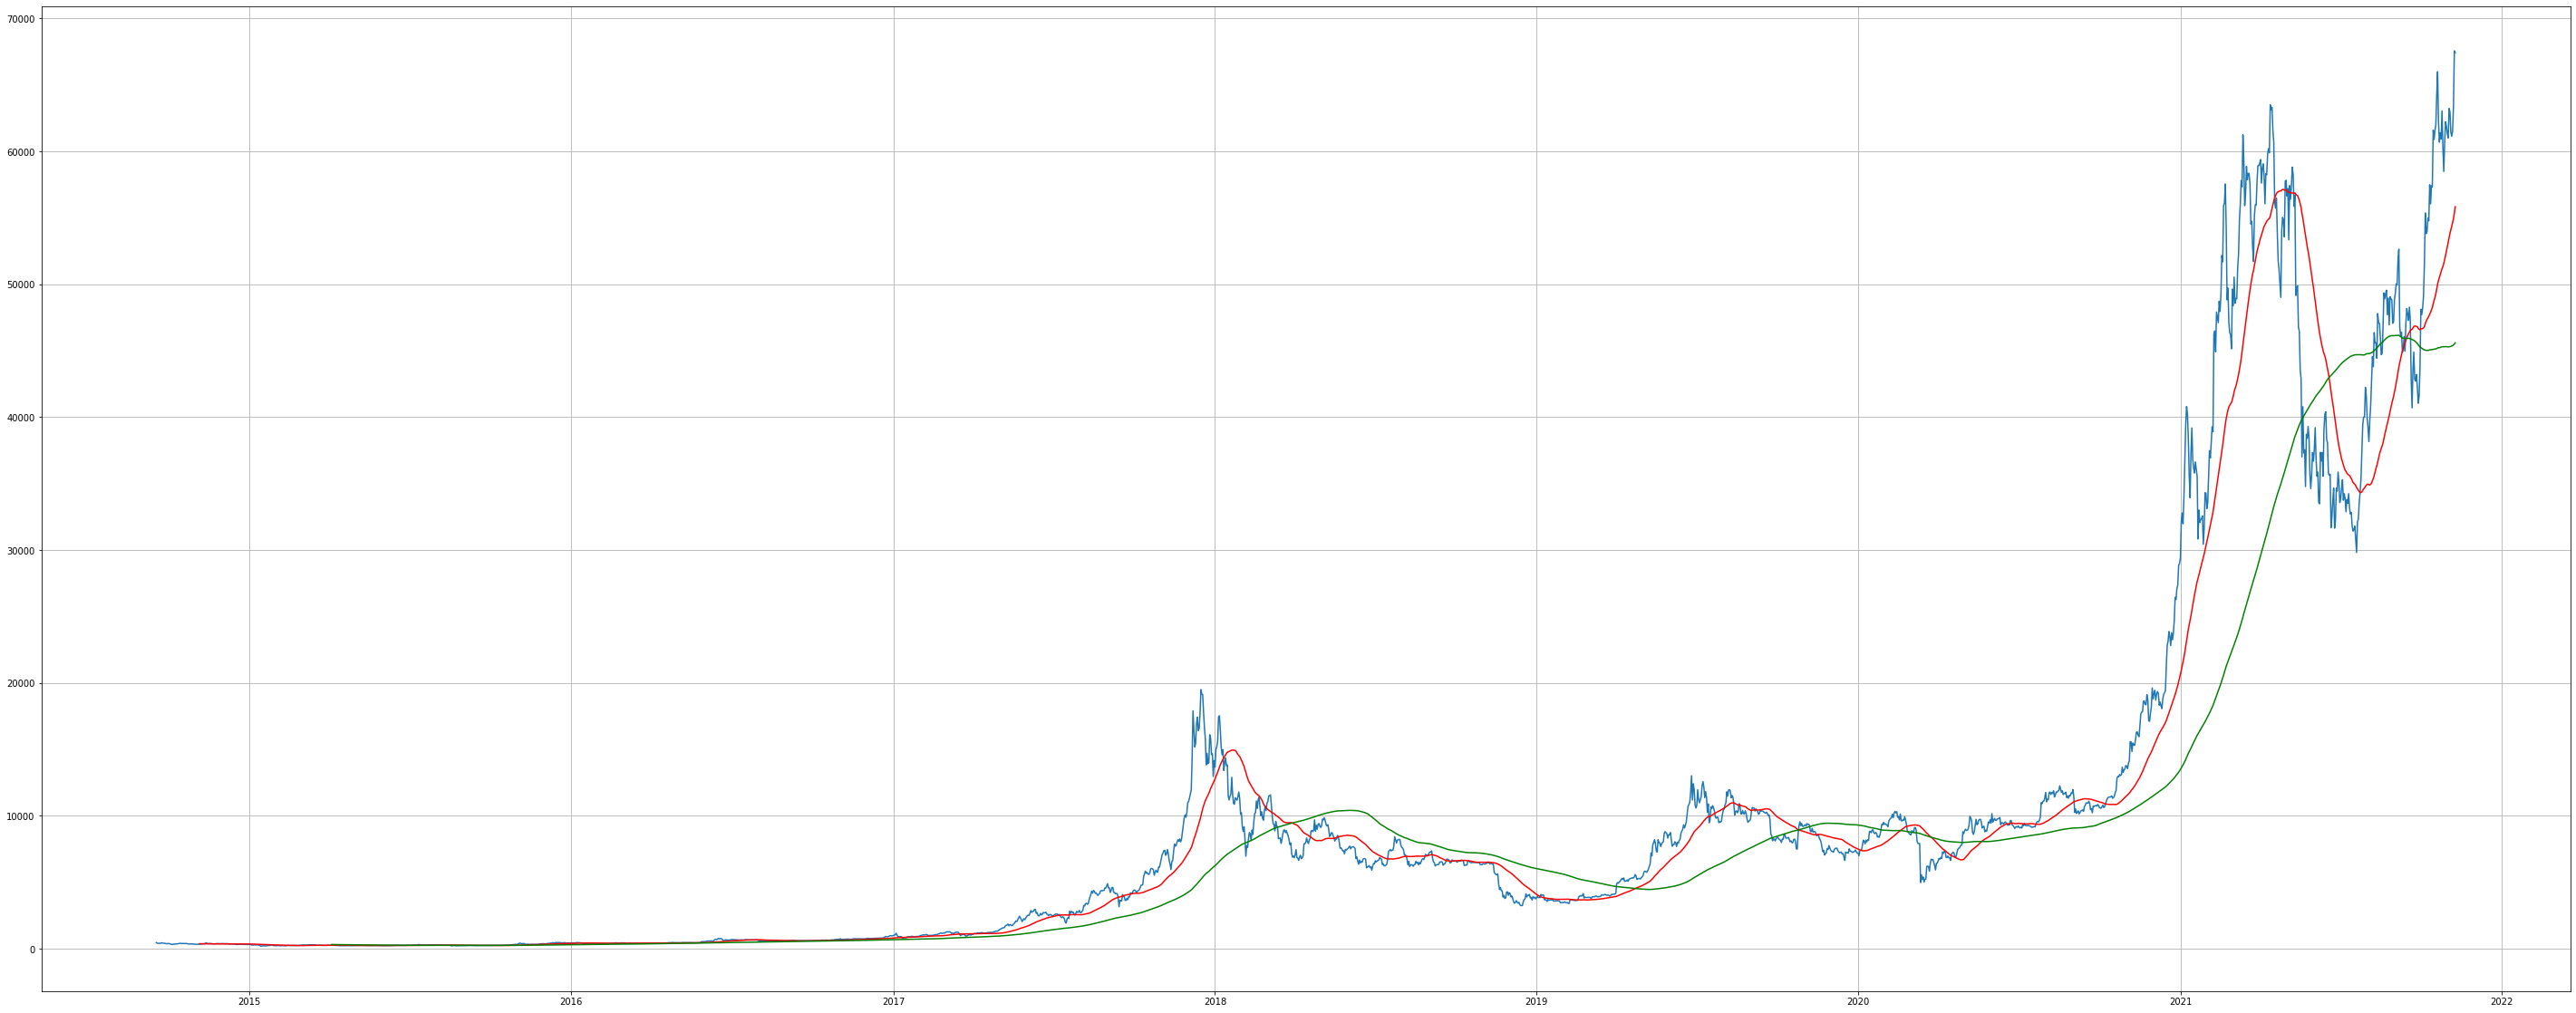

In [32]:
#plot graph with multiple lines: price, 50MA and 200MA
make_graph(BTC_MA2)


Hiermee verder gaan!! 2-11-2021

Future dates
use .rolling(windows = , min_periods=


In [33]:
"""
Our line graph stops at the last date of the 'Price' column
We have to estimate the 200MA and 50MA
the .rolling has 'min_periods': the least amount of periods needed in order to 
calculate the MA. 
"""
#https://stackoverflow.com/questions/59844745/adding-future-dates-to-dataframe
#https://stackoverflow.com/questions/59864088/create-future-dataframe-date-column-pandas-python
#https://stackoverflow.com/questions/51487017/pandas-rolling-window-mean-in-the-future
BTC_MA3 = BTC_MA2.copy()
BTC_MA3 = BTC_MA3.reset_index()




In [39]:
#Adding future dates in our dataset.
#https://stackoverflow.com/questions/61153546/addition-subtraction-of-integers-and-integer-arrays-with-timestamp-is-no-longer
#create new dates give 2021-11-01 and 2021-11-01. We need to .shift(-1) to get the right date. 
df_date = pd.DataFrame(pd.date_range(BTC_MA3['Date'].min(), BTC_MA3['Date'].max() + pd.Timedelta(50, unit='D'), closed='right', freq='D').shift(-1))
df_date = df_date.join(BTC_MA3, on=df_date.index)
df_date = df_date.drop('Date', axis=1)
df_date = df_date.rename(columns={0:'Date'}).set_index('Date')
#df_date.iloc[2575:2625, ]

In [35]:
#Using min_periods for future predictions of 50MA and 200MA
df_date['50MA'] = df_date.rolling(window=50, min_periods=30).mean()
df_date['200MA'] = df_date.rolling(window=200, min_periods=175).mean()
#df_date.iloc[2575:2625, ]

<Figure size 432x288 with 0 Axes>

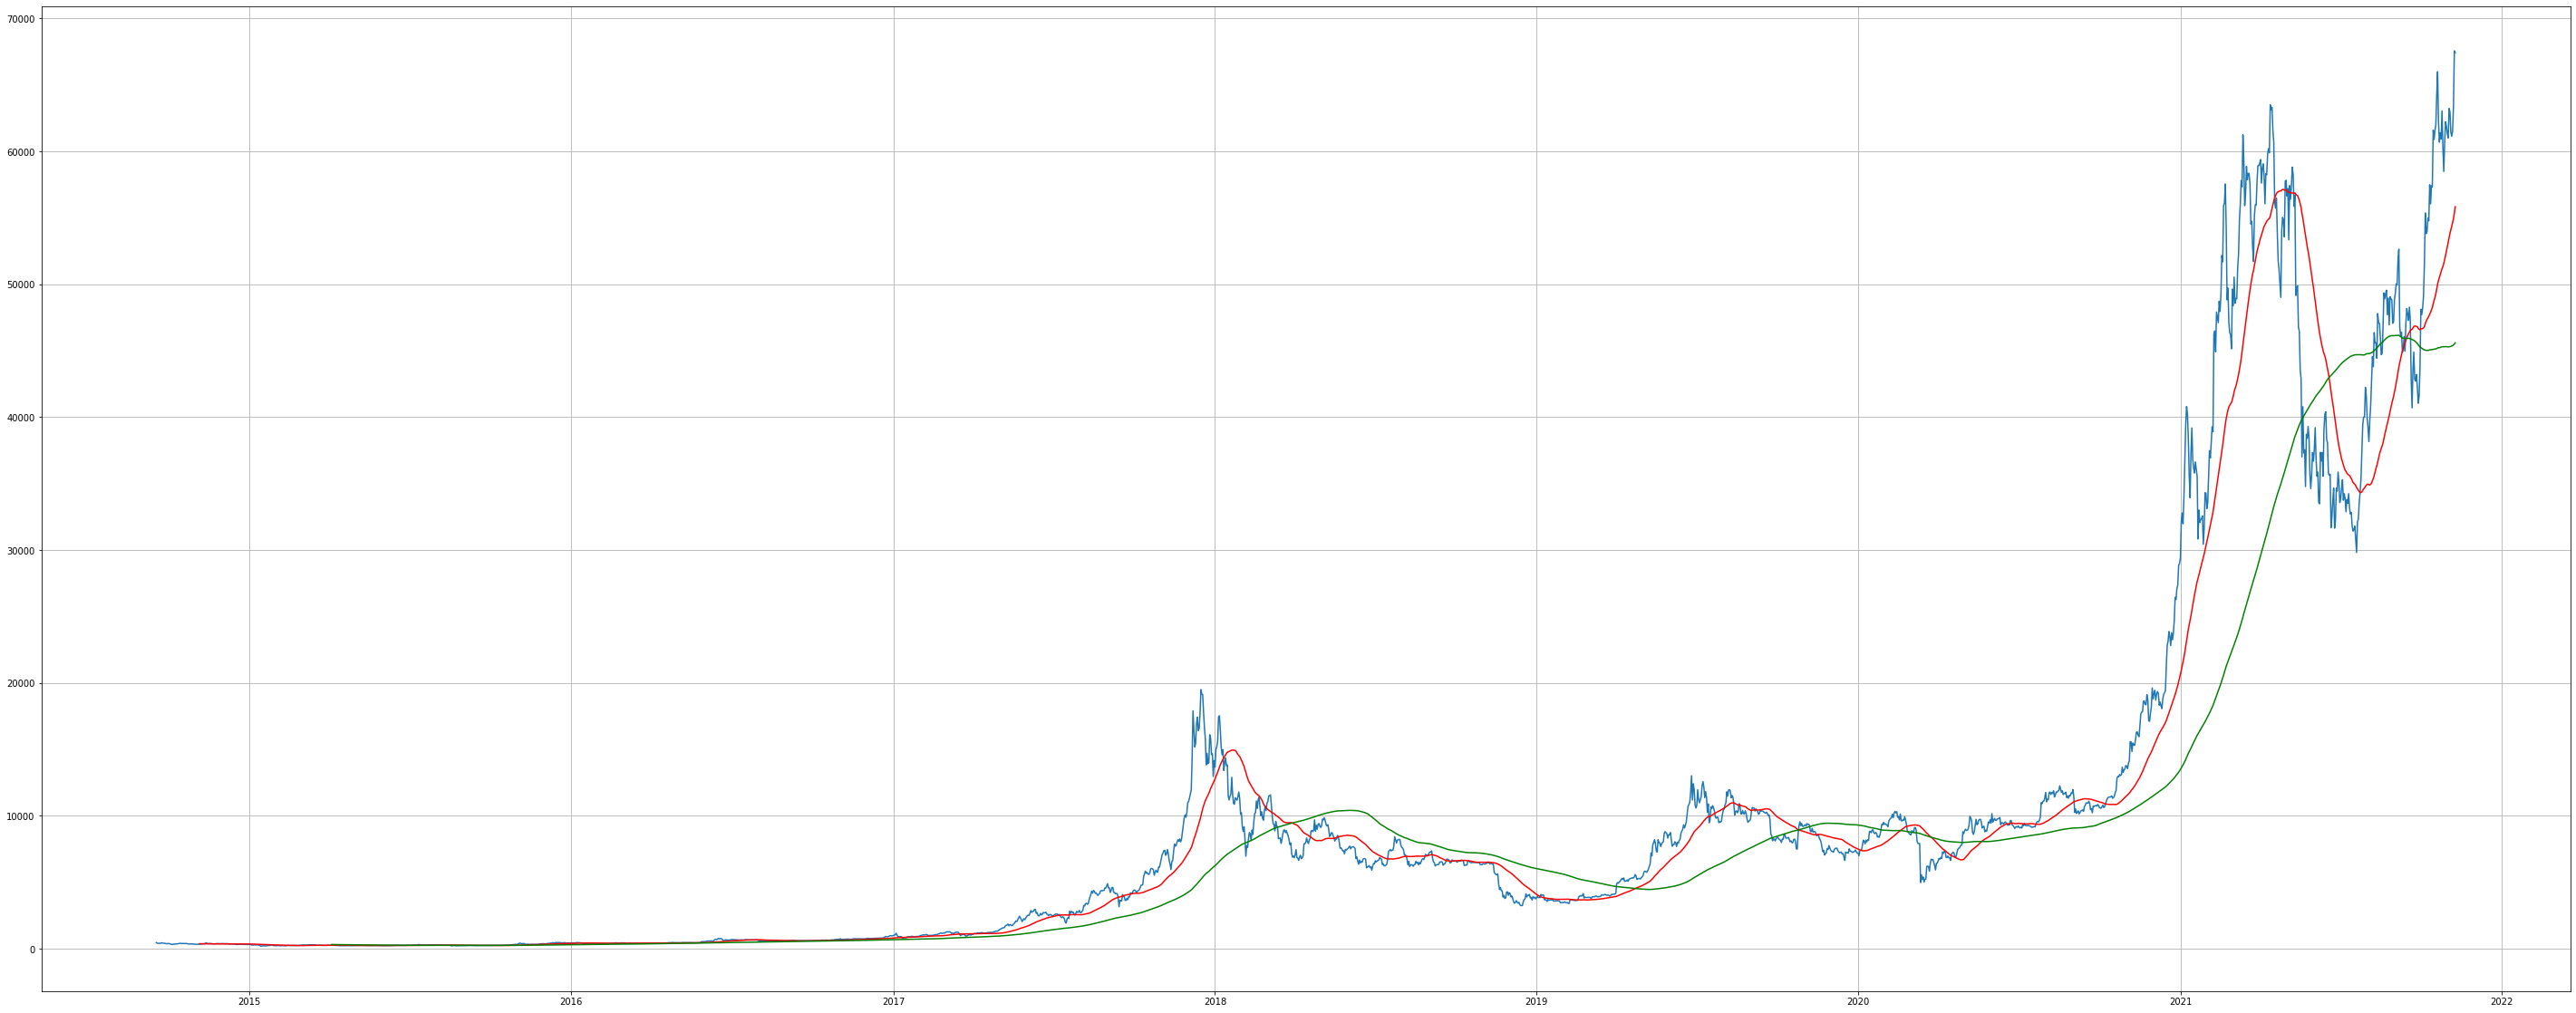

<Figure size 432x288 with 0 Axes>

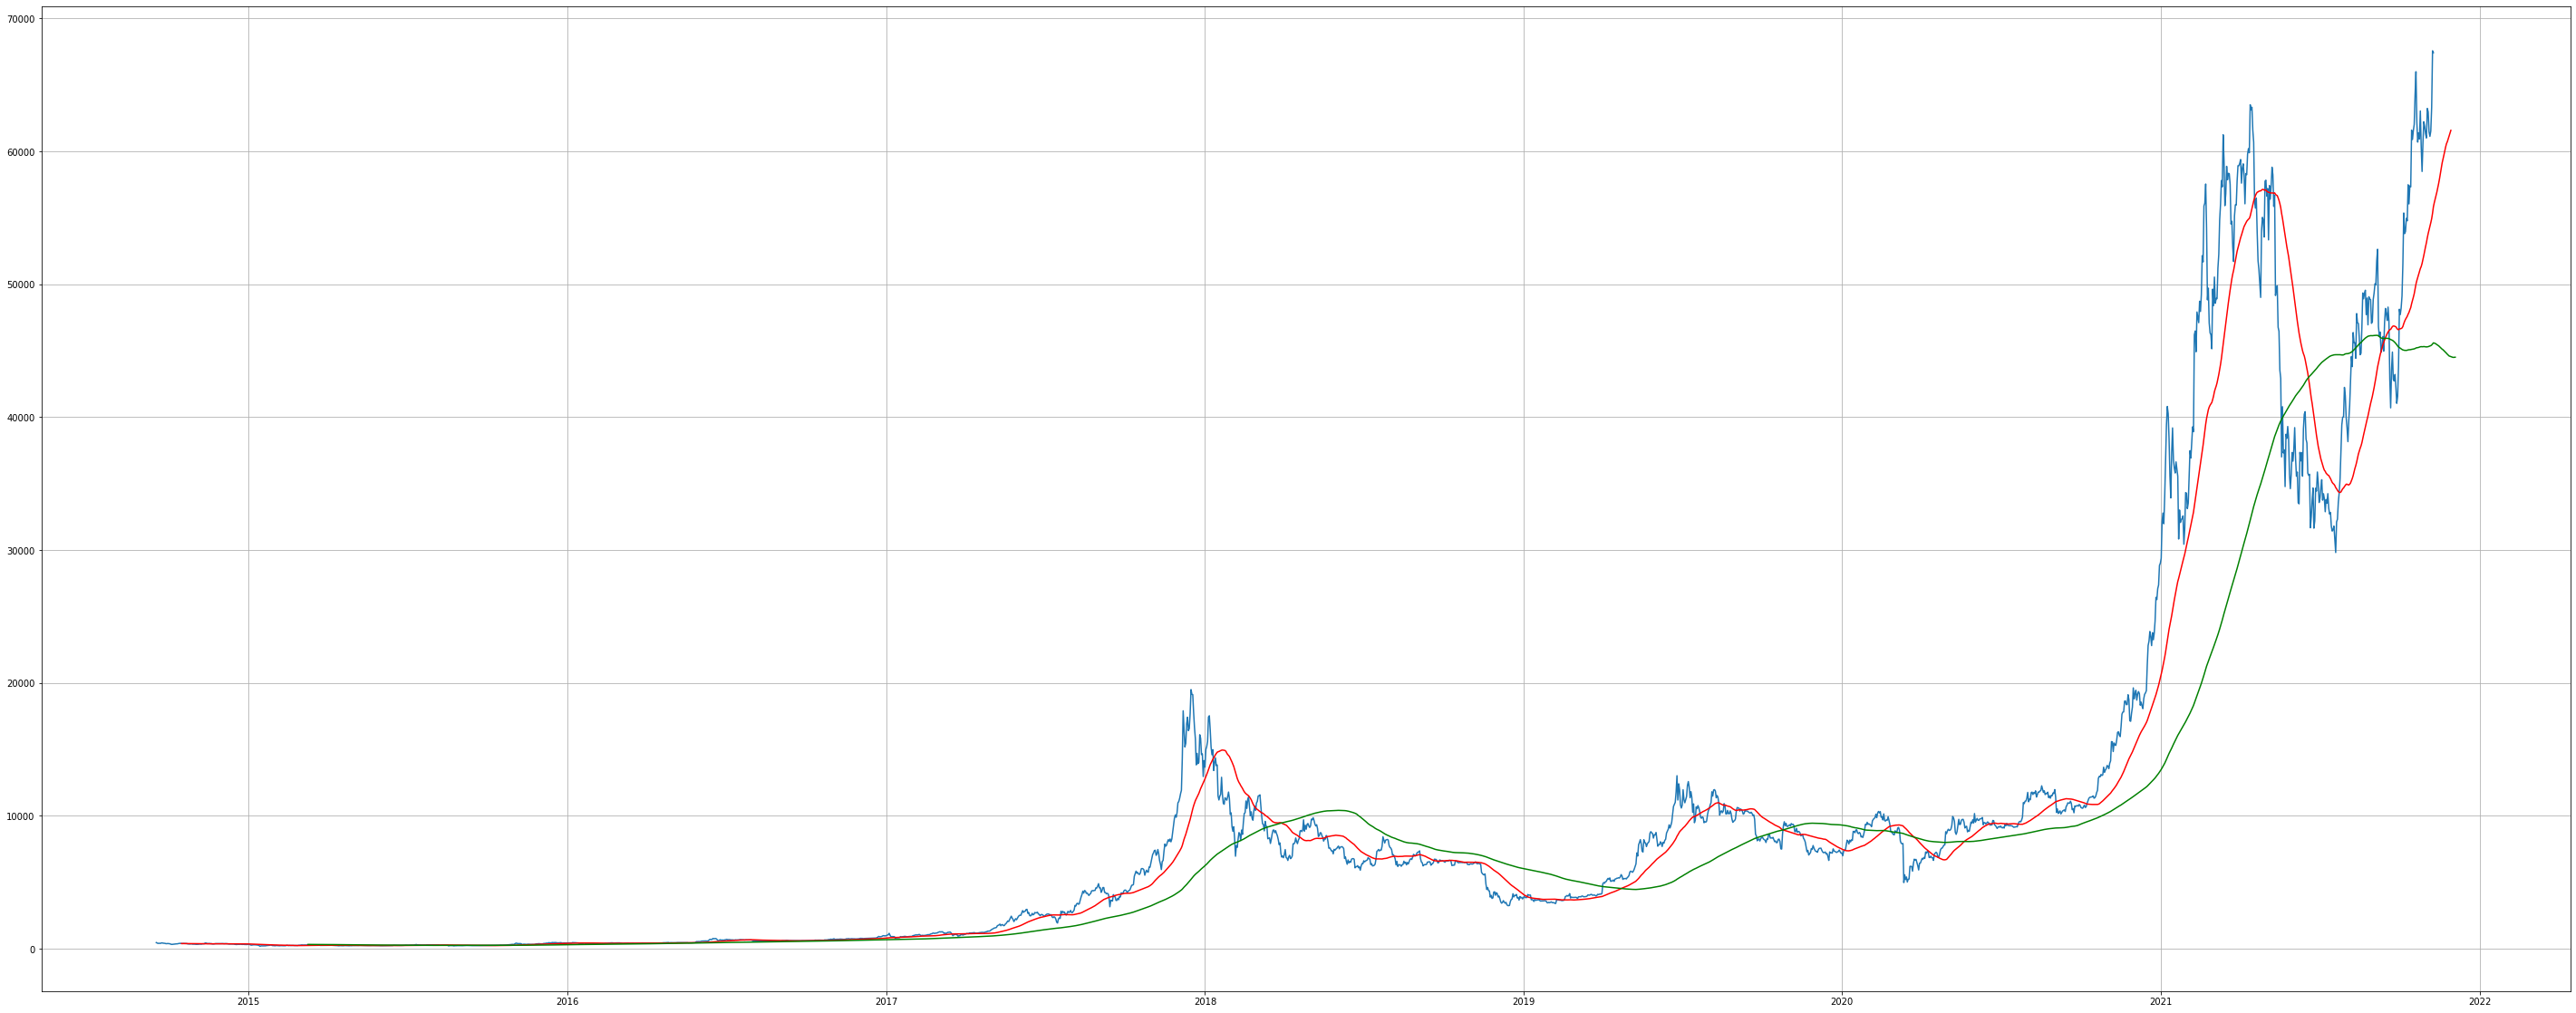

In [36]:
#make copy of df_date
pred_BTC = df_date.copy()
#make future prediction of BTC of a particular year
pred_BTC_2021 = pred_BTC.iloc[2550:, ]

#plot graph with multiple lines: price, 50MA and 200MA
#https://www.python-graph-gallery.com/122-multiple-lines-chart
make_graph(BTC_MA2)
make_graph(pred_BTC)

<Figure size 432x288 with 0 Axes>

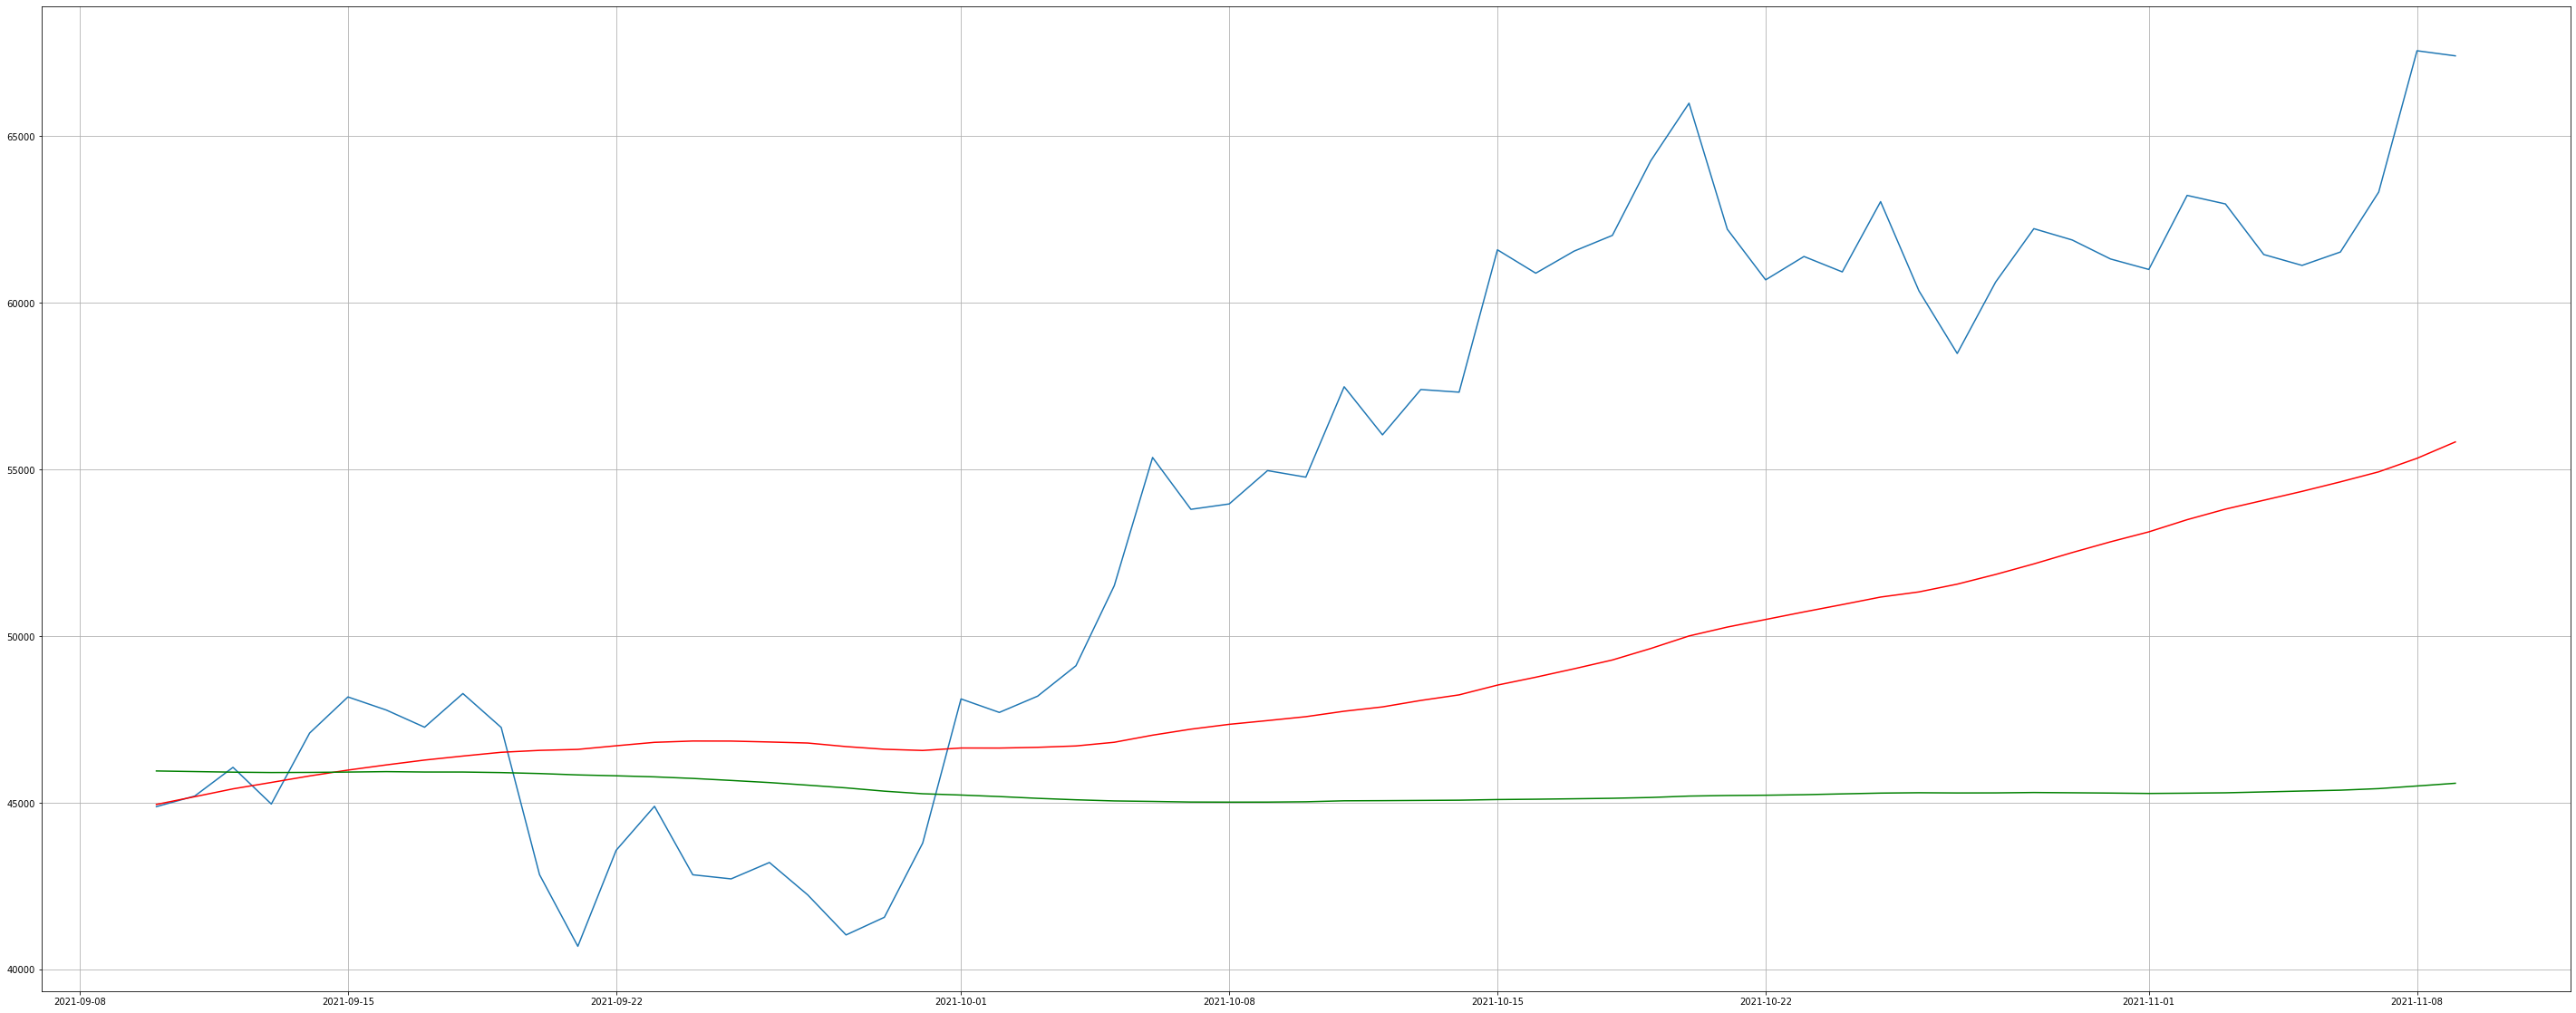

<Figure size 432x288 with 0 Axes>

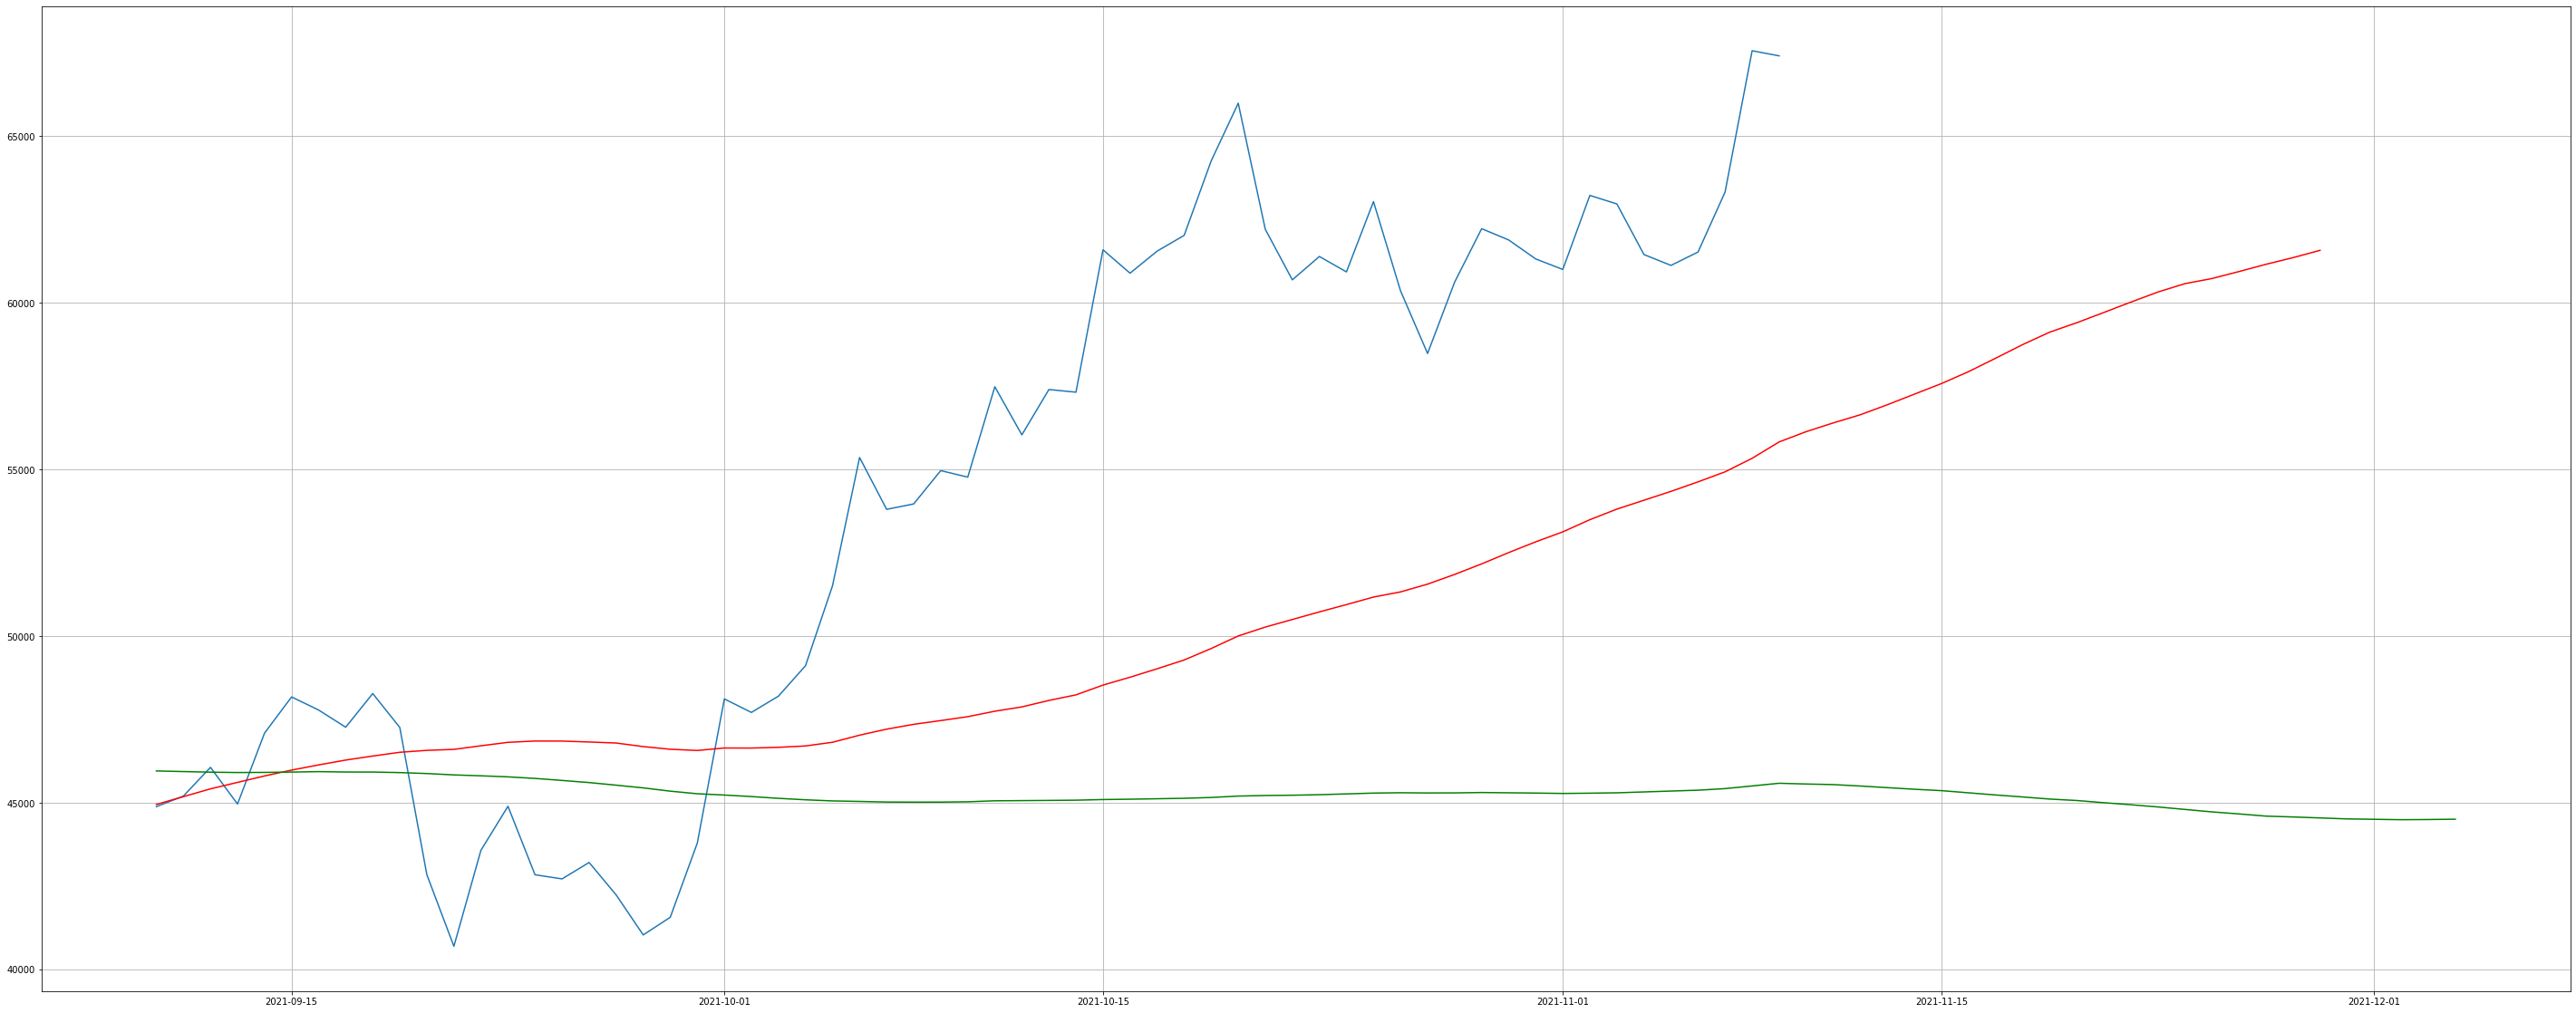

In [38]:
#graph from august 2021 until present
make_graph(BTC_2021)
make_graph(pred_BTC_2021)

### **Web Scraping and Sentiment Analysis**

In [ ]:
#Sources
"""
Web Scraping
#https://realpython.com/sentiment-analysis-python/


#Sentiment Analysis
#https://realpython.com/beautiful-soup-web-scraper-python/
"""